# MACHINE LEARNING PROJECT: ​IT 461 phase2 - [Bank Churn analysis and modleing]

## ​Prepared by (according to KSU id):

leader: Aisha Alsaggaf , 443203061

​Ghaina Alhassnan, 443200495

Athbah Alaliwei , 443200628

Shaden Alturki, 443203057

Dimah Alharbi  443200784

<br>

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#cleaning">Data Processing and Cleaning</a></li>
<li><a href="#feature">Feature Selection</a></li>
<li><a href="#lr">Modeling (leaniar regression)</a></li>
<li><a href="#svm">Modeling (SVM)</a></li>
<li><a href="#ref">References</a></li>


</ul>

<a id='intro'></a>
## *Introduction*

### Dataset Description

> **Bank Churn dataset** The data we will collect is printer’s information in amazon, for rows each row represent individual printer details available on Amazon, while columns represent various printer’s features or characteristics as shown below:

>**Customer ID**: A unique identifier for each customer.
>
>**Surname**: The customer's surname or last name.
>
>**Geography**: The country where the customer resides (France, Spain or Germany).  
>
>**Gender**: The customer's gender (Male or Female)
>
>**Age**: The customer's age.
>
>**Tenure**: The number of years the customer has been with the bank.
>
>**Balance**: The customer's account balance.
>
>**HasCrCard**: Whether the customer has a credit card (1 = yes, 0 = no).
>
>**IsActiveMember**: Whether the customer is an active member (1 = yes, 0 = no).
>
>**EstimatedSalary**: The estimated salary of the customer.this printer.
>
>**Exited**: Whether the customer has churned (1 = yes, 0 = no).

### Question(s) for Analysis
>**Question 1**: What features to select for modeling?
>
>**Question 3**: What are the best hyperparameters to fit the model(s)?
>
>**Question 2**: What are the metrics for both baseline models (SVM + binary LR)?
>
>**Question 4**: Did the model(s) perform better after optimizing it using Neural Network?
>
>

In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files
from collections import OrderedDict
from itertools import product
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

<a id='cleaning'></a>
## Data Cleaning and Preproccesing

#### a: discovering the dataset

In [2]:
 # upload file form drive
 uploaded = files.upload()

Saving Churn.csv to Churn.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Churn.csv']))
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


### Checking how tha data looks like

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### b-Cleaning:
##### as this dataset was taken from kaggle and labeled as clean data, we will proceed by only removing the null enitities and duplicated value (as it is the only process needed according to kaggle and outcomes of looking through the dataset)

In [5]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [6]:
# drop the entities containing null values
if 1 in (df.isnull().sum().values):
    df=df.dropna(axis=0)

# then check it
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [7]:
# checking duplicates
df.duplicated().sum()

2

In [8]:
# removing duplicates
df.drop_duplicates(inplace=True)

<ipython-input-8-1d10c81cf306>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


### c: preproccesing

##### apply one-hot-encoding
###### for Geograpgy (france: 0, spain: 1, germany: 2), and for Gender (male: 0, female: 1).

In [9]:
#for both geography and gender
df['Geography'] = df['Geography'].replace({'France' : 0, 'Spain' : 1, 'Germany' : 2})
df['Gender'] = df['Gender'].replace({'Male' : 0, 'Female': 1})

<ipython-input-9-0f70d5479c55>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography'] = df['Geography'].replace({'France' : 0, 'Spain' : 1, 'Germany' : 2})
<ipython-input-9-0f70d5479c55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Geography'] = df['Geography'].replace({'France' : 0, 'Spain' : 1, 'Germany' : 2})
<ipython-input-9-0f70d5479c55>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.in

In [10]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,1,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,0,1,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,1,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,0,0,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,0,1,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,2,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1


<a id='feature'></a>
## Feature Selection

#### a: dropping irrelevant features.

In [11]:
df = df.drop(columns=['RowNumber', 'CustomerId','Surname'])

In [12]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,1,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,0,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1


###### b: slection
###### To choose features to select, we will calculate the r-score with all festures as a baseline, and then we will compare it to our different perspectines of different  -customers' demographics- features' importance, then compare them to different sets of independant features:

>1/ Select features specifically related to customers and statistical feature that give an insight of the customers financial status (remove other bank features) Final set:['CreditScore',	'Geography',	'Gender',	'Age',	'Balance',	'NumOfProducts',	'IsActiveMember',	'EstimatedSalary'].

>2/ Select features that specifically give an insight on the customer-bank relationship (remove bio demograohic features Age and Gender) Final set ['CreditScore','Geography', 'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard', 'IsActiveMember',	'EstimatedSalary'].

>3/ Select specific customers and bank features(remove geography) Final set['CreditScore',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary'].

Next calculate the R-squared of the new set and plot the residuals of independant variables. Features with highest scores -wich are  to most likely to affect our target class 'Exited'- will be selected.


b.1: calculate r-score using leaniar regression

R-squared all features: 0.14707102187646337


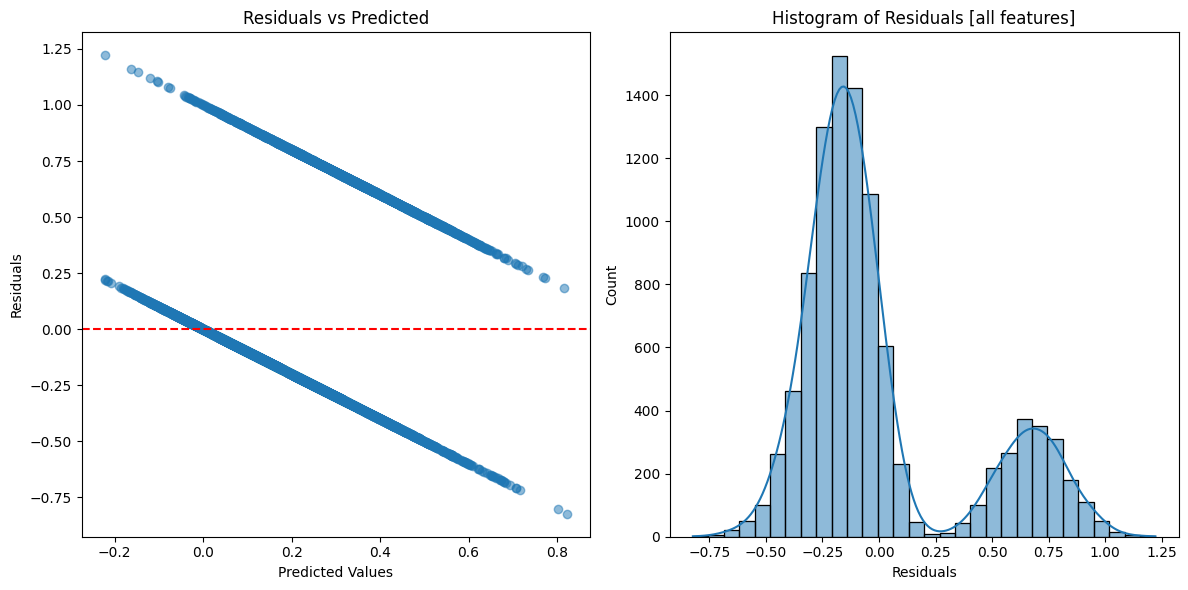

R-squared without customer-bank related features (Tenure and HasCrCard): 0.14685701765309833


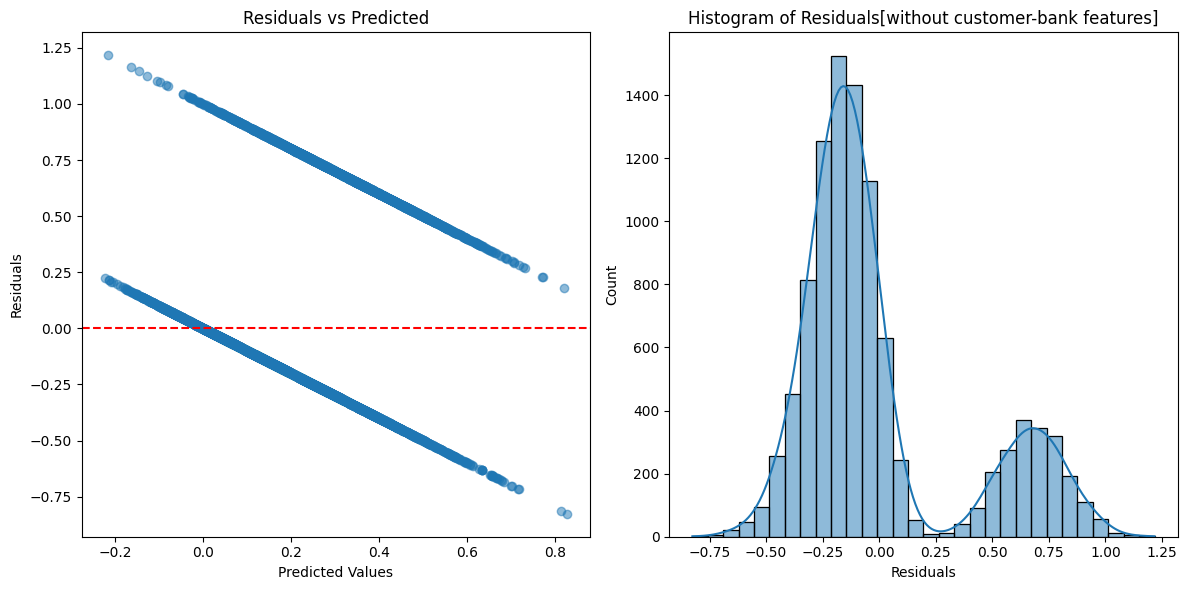

R-squared wothout bio demographic features (Age, Gender): 0.05368339490140761


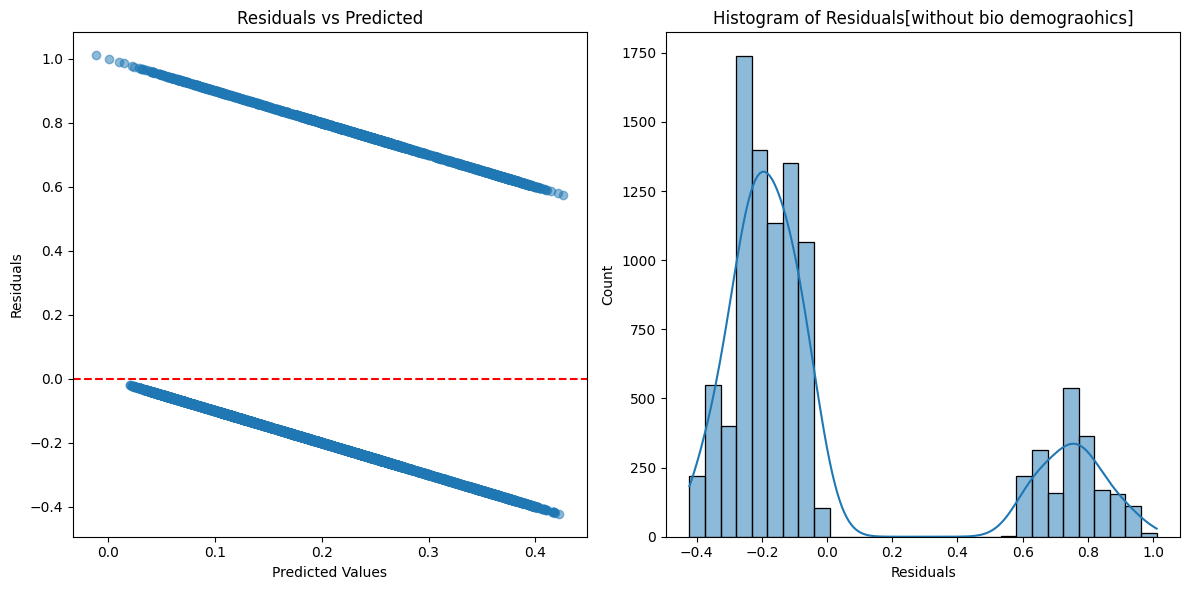

R-squared withou Geography feature: 0.13590418021175943


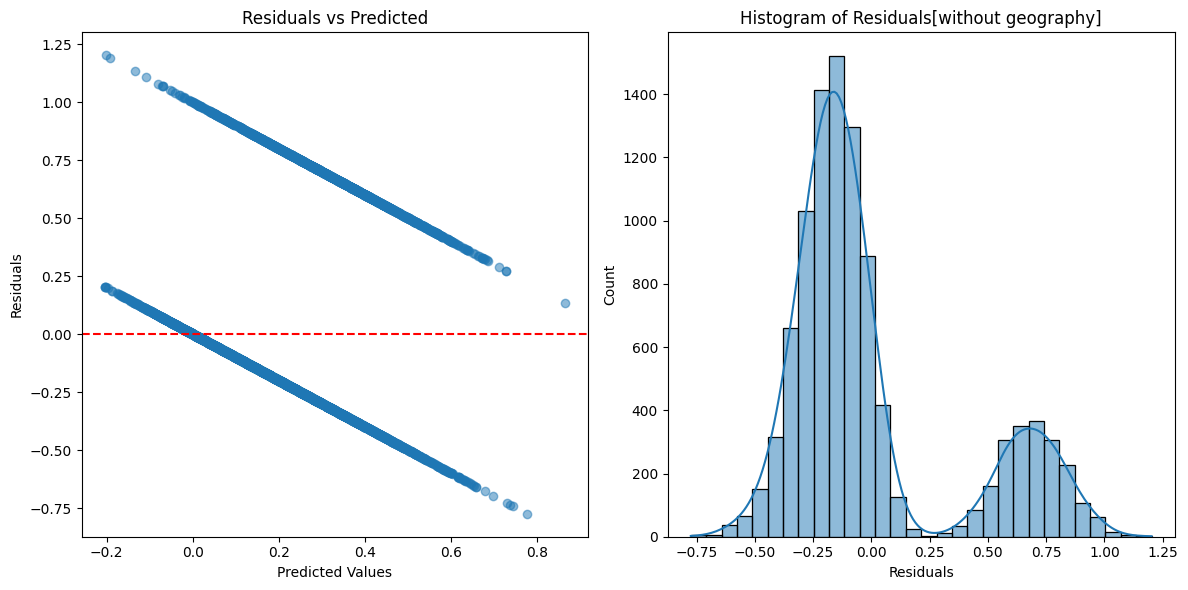

In [13]:
# specify the features to use "all" as a base option
allFeatures = ['CreditScore',	'Geography',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary']
X = df[allFeatures]  # independant variable
y = df['Exited']  # dependant (target)

#now we will fit the model, predict, calculate r-score, and print it
model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)
rSquared = r2_score(y, pred)
print("R-squared all features:", rSquared)

residuals = y - pred

# Plotting residuals
plt.figure(figsize=(12, 6))

# Residuals vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals [all features]')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()







# first try removing customer-bank related feautres: remove tenure and HasCrCredit
WOTenHasfeatures = ['CreditScore',	'Geography',	'Gender',	'Age',	'Balance',	'NumOfProducts',	'IsActiveMember',	'EstimatedSalary']
X = df[WOTenHasfeatures]
y = df['Exited']

model.fit(X, y)
pred = model.predict(X)
rSquared = r2_score(y, pred)
print("R-squared without customer-bank related features (Tenure and HasCrCard):", rSquared)


residuals = y - pred

# Plotting residuals
plt.figure(figsize=(12, 6))

# Residuals vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals[without customer-bank features]')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# second try removing bio demographic customer features: remove Age, Gender.
WOGenGeofeatures = ['CreditScore','Geography', 'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard', 'IsActiveMember',	'EstimatedSalary']
X = df[WOGenGeofeatures]
y = df['Exited']

model.fit(X, y)
pred = model.predict(X)
rSquared = r2_score(y, pred)
print("R-squared wothout bio demographic features (Age, Gender):", rSquared)


residuals = y - pred

# Plotting residuals
plt.figure(figsize=(12, 6))

# Residuals vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals[without bio demograohics]')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()
# thirdly try removing geo customer features: remove Geograohy.
WOGeofeature = ['CreditScore',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary']
X = df[WOGeofeature]  # independant variable
y = df['Exited']  # dependant (target)

#now we will fit the model, predict, calculate r-score, and print it
model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)
rSquared = r2_score(y, pred)
print("R-squared withou Geography feature:", rSquared)


residuals = y - pred

# Plotting residuals
plt.figure(figsize=(12, 6))

# Residuals vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals[without geography]')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()



#### b.2:discussing results:
    we know that R-squared evaluates the scatter of the data points around the fitted regression line.
    It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression.
    For the same data set, higher R-squared values represent smaller
    differences between the observed data and the fitted values.
    R-squared is the percentage of the dependent variable variation that a linear model explains(1).
    And as we cannot use R-squared to determine whether the coefficient estimates and predictions are biased,
    we assessed the residual plots to visually see and inerpret the residuals.
#### Table of results

<table>
<legend>Results Summary</legend>
  <tr>
    <th>Features</th>
    <th>R-Score</th>
    <th>Residuals Increasment/Decreasment</th>
  </tr>
  <tr>
    <td>allFeatures</td>
    <td>0.14707</td>
    <td>Standard(base)</td>
  </tr>
  <tr>
    <td>WOTenHasfeatures</td>
    <td> 0.14685</td>
    <td>low Increasment</td>
  </tr>
  <tr>
    <td>WOGenGeofeatures</td>
    <td>0.05368</td>
    <td>High Increasment</td>
  </tr>
  <tr>
    <td>WOGeofeature</td>
    <td>0.13591</td>
    <td>Elevated Increasment</td>
  </tr>
 </table>
<br>
  As shown in the results above, we notice how R-squared had the highest value of 14.71% when considring all features, we also infer from the bimodal histogram[all features] that residuals had the minimum values universally, as the peaks lean closer to zero compared to other graphs. In conclusion, having all features is the best choice for modelling.
  As the selected features still had a very low R-squared value, this leads to the following question:
  #### Are Low R-squared Values Always a Problem?

According to research(1), Regression models with low R-squared values can be perfectly good models for several reasons:
Some fields of study have an inherently greater amount of unexplainable variation. In these areas, R2 values are bound to be lower. For example, studies that try to explain human behavior generally have R2 values less than 50%. People are just harder to predict than things like physical processes(1).

For that we will proceed prediction process with the highest score of feature selection we obtained 14.71% with the aim to optimize the preformance of models using Nueral Network

In [14]:
df.to_csv('churnProcessed.csv', index=False,)

<a id='lr'></a>
## Modelling (Logistic Reression)


In [15]:
df = pd.read_csv('churnProcessed.csv')

In [16]:

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(solver='liblinear', max_iter=100)

# Apply 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.79125    0.78549093 0.79612258 0.7873671  0.79362101]
Mean Cross-Validation Score: 0.790770325203252


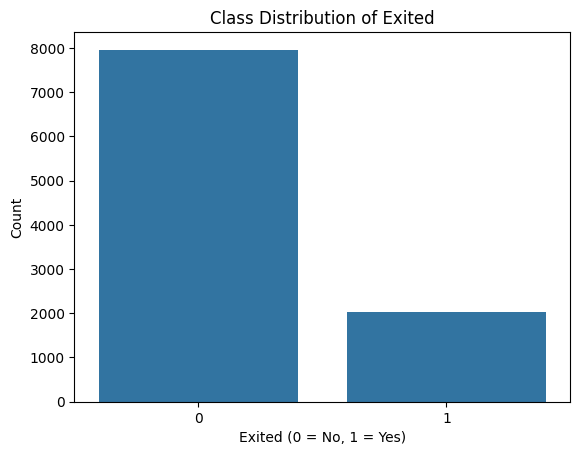

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Exited' target variable
sns.countplot(x=y)
plt.title('Class Distribution of Exited')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

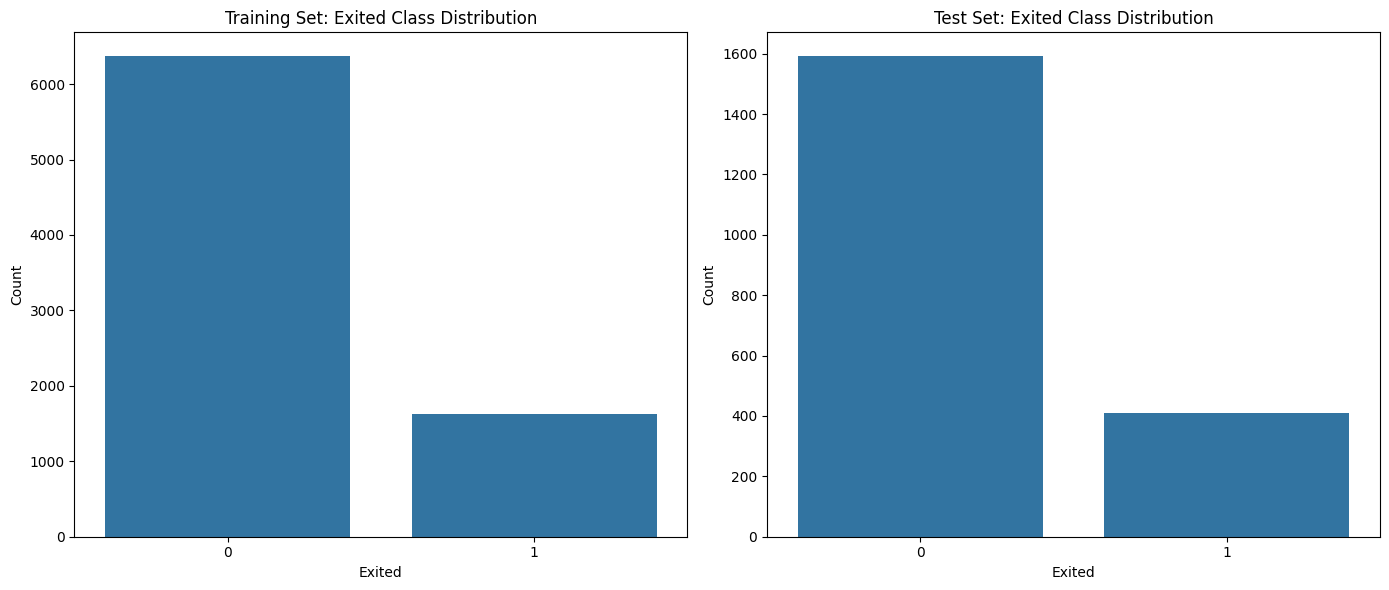

In [18]:
# Plot the distribution of 'Exited' in training and test sets
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=y_train, ax=axes[0])
axes[0].set_title('Training Set: Exited Class Distribution')
axes[0].set_xlabel('Exited')
axes[0].set_ylabel('Count')

sns.countplot(x=y_test, ax=axes[1])
axes[1].set_title('Test Set: Exited Class Distribution')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [56]:
import joblib

# Define the parameter grid for C, penalty, and max_iter
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 500]  # Number of iterations
}

logreg = LogisticRegression(solver='liblinear')

# Reshape data back to 2D for logistic regression
if len(X_train.shape) > 2:
    X_train_2d = X_train.reshape(X_train.shape[0], -1)
    X_test_2d = X_test.reshape(X_test.shape[0], -1)
else:
    X_train_2d = X_train
    X_test_2d = X_test

# Perform grid search with cross-validation for C, penalty, and max_iter
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train_2d, y_train)

# Output the best hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Save the best model
joblib.dump(best_model, 'logistic_regression_model.pkl')

# Evaluate the best model on the test set
y_pred_prob = best_model.predict_proba(X_test_2d)[:, 1]  # Probabilities for the positive class

# Define thresholds for evaluation
thresholds = [0.25, 0.3, 0.35, 0.4, 0.5]

# Evaluate at different thresholds
for thresh in thresholds:
    y_pred_custom_thresh = (y_pred_prob >= thresh).astype(int)

    print(f"\nEvaluation with decision threshold = {thresh}:")
    print("Accuracy:", accuracy_score(y_test, y_pred_custom_thresh))
    print("Precision:", precision_score(y_test, y_pred_custom_thresh))
    print("Recall:", recall_score(y_test, y_pred_custom_thresh))
    print("F1-Score:", f1_score(y_test, y_pred_custom_thresh))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_thresh))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))


Best hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2'}
Best cross-validation score: 0.7661670557972824

Evaluation with decision threshold = 0.25:
Accuracy: 0.473
Precision: 0.26748377793799566
Recall: 0.9070904645476773
F1-Score: 0.4131403118040089
Confusion Matrix:
 [[ 575 1016]
 [  38  371]]
ROC-AUC Score: 0.7624535321697998

Evaluation with decision threshold = 0.3:
Accuracy: 0.6355
Precision: 0.33263598326359833
Recall: 0.7775061124694377
F1-Score: 0.46593406593406594
Confusion Matrix:
 [[953 638]
 [ 91 318]]
ROC-AUC Score: 0.7624535321697998

Evaluation with decision threshold = 0.35:
Accuracy: 0.746
Precision: 0.41509433962264153
Recall: 0.5916870415647921
F1-Score: 0.4879032258064516
Confusion Matrix:
 [[1250  341]
 [ 167  242]]
ROC-AUC Score: 0.7624535321697998

Evaluation with decision threshold = 0.4:
Accuracy: 0.7975
Precision: 0.5056179775280899
Recall: 0.4400977995110024
F1-Score: 0.47058823529411764
Confusion Matrix:
 [[1415  176]
 [ 229  180]]
ROC-AUC Scor

We used GridSearch for hyperparameter tuning of a Logistic Regression model, opting for grid search over random search to exhaustively explore combinations of C (regularization strength), penalty (L1 or L2), and max_iter (iterations). This helped us identify the best-performing configuration.

We then evaluated the model's performance using different decision thresholds (0.25 to 0.5) to find the optimal balance between precision and recall. The model's accuracy, precision, recall, F1-score, and ROC-AUC were examined at each threshold to assess its suitability for our classification task.

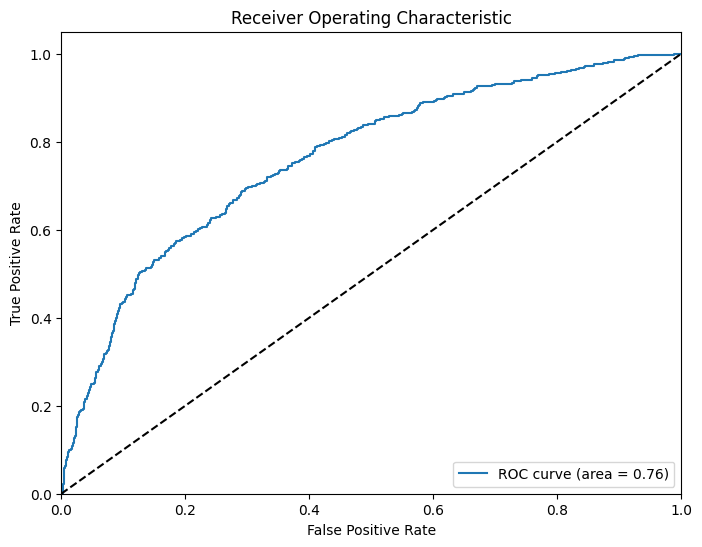

In [21]:

# Plot ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# ROC Curve:

This curve shows the model's ability to distinguish between classes. The area under the curve (AUC = 0.76) indicates that the model has a good ability to differentiate between positive and negative cases. The higher the curve, the better the model is at distinguishing between the two outcomes.

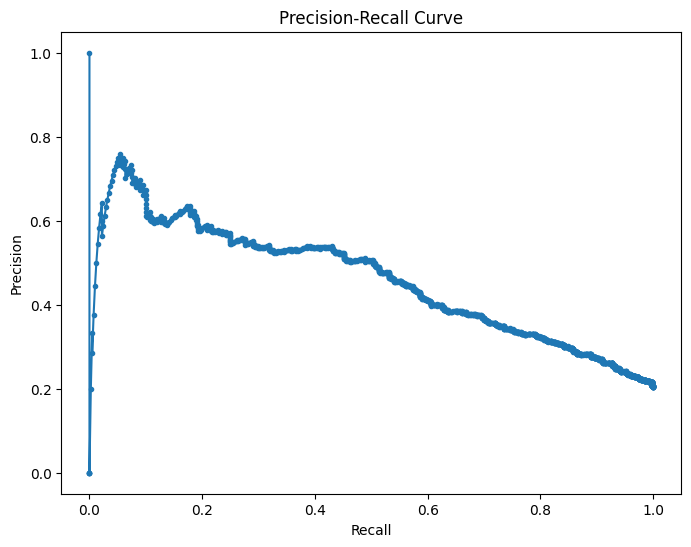

In [22]:
# Plot Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Precision-Recall Curve:

This curve illustrates the trade-off between precision and recall as the decision threshold is adjusted. The model starts with high precision, but as recall increases, precision decreases, indicating that at higher thresholds, the model sacrifices precision to capture more positive cases.

<Figure size 600x400 with 0 Axes>

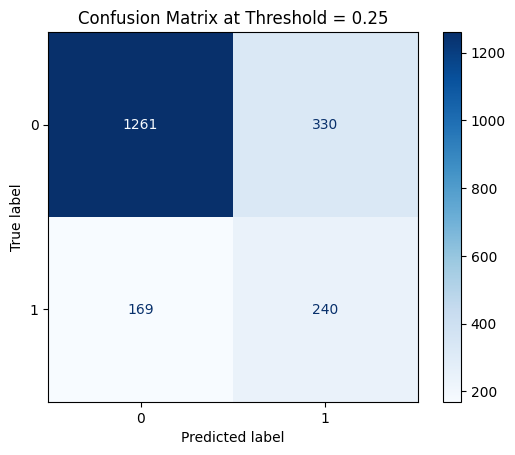

<Figure size 600x400 with 0 Axes>

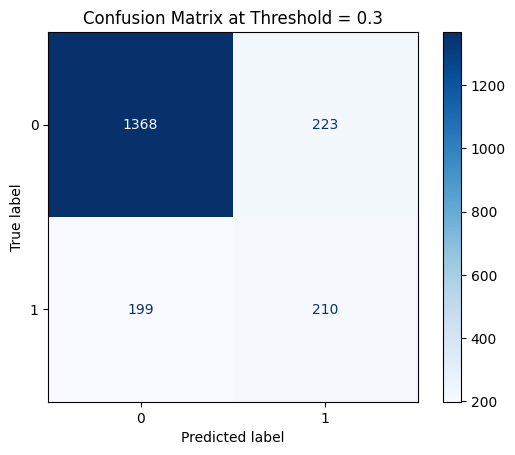

<Figure size 600x400 with 0 Axes>

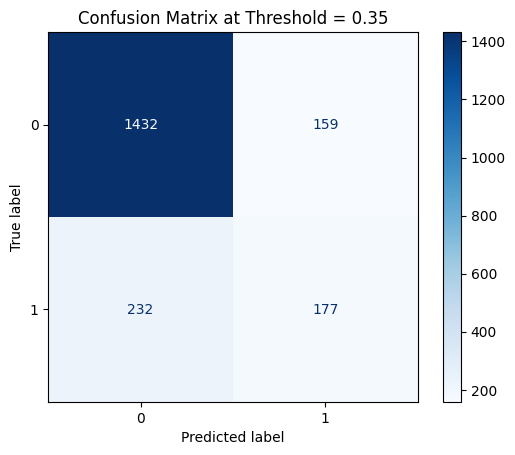

<Figure size 600x400 with 0 Axes>

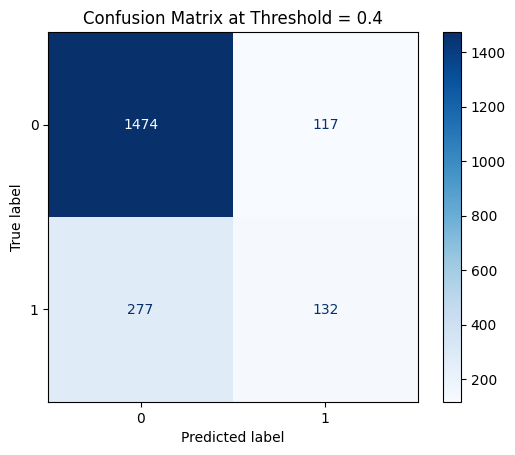

<Figure size 600x400 with 0 Axes>

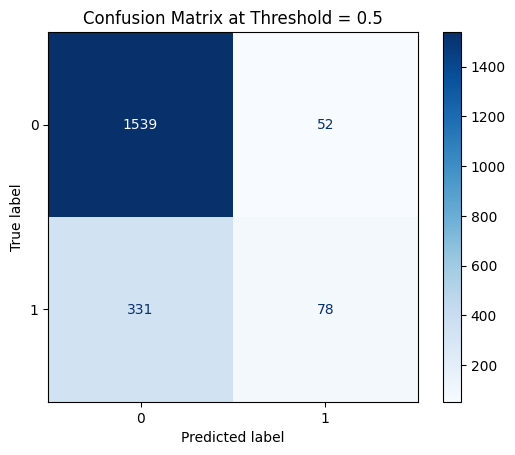

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# List of thresholds to evaluate
thresholds = [0.25, 0.3, 0.35, 0.4, 0.5]

# Evaluate and plot the confusion matrix for each thresholds
for thresh in thresholds:
    y_pred_custom_thresh = (y_pred_prob >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_custom_thresh)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    plt.figure(figsize=(6, 4))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix at Threshold = {thresh}')
    plt.show()


In [24]:
import pandas as pd

# Confusion matrix values for threshold 0.25 and 0.3
confusion_0_25 = {"TP": 240, "FP": 330, "TN": 1261, "FN": 169}
confusion_0_3 = {"TP": 210, "FP": 223, "TN": 1368, "FN": 199}

def calculate_metrics(confusion):
    TP = confusion["TP"]
    FP = confusion["FP"]
    TN = confusion["TN"]
    FN = confusion["FN"]

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        "TP": TP,
        "FP": FP,
        "TN": TN,
        "FN": FN,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    }

# Calculate metrics for both thresholds
metrics_0_25 = calculate_metrics(confusion_0_25)
metrics_0_3 = calculate_metrics(confusion_0_3)

comparison_df = pd.DataFrame([metrics_0_25, metrics_0_3], index=["Threshold 0.25", "Threshold 0.3"])

# Display
print(comparison_df)


                 TP   FP    TN   FN  Accuracy  Precision    Recall  F1-Score
Threshold 0.25  240  330  1261  169    0.7505   0.421053  0.586797  0.490296
Threshold 0.3   210  223  1368  199    0.7890   0.484988  0.513447  0.498812


## Confusion Matrix (at Threshold 0.25):

The confusion matrix at a threshold of 0.25 shows the model's classification results: true positives (240), true negatives (1261), false positives (330), and false negatives (169). This threshold prioritizes recall, which is critical for our application, as we aim to minimize false negatives. By choosing this threshold, we improve the model's ability to identify positive cases, even if it slightly reduces precision by allowing more false positives.


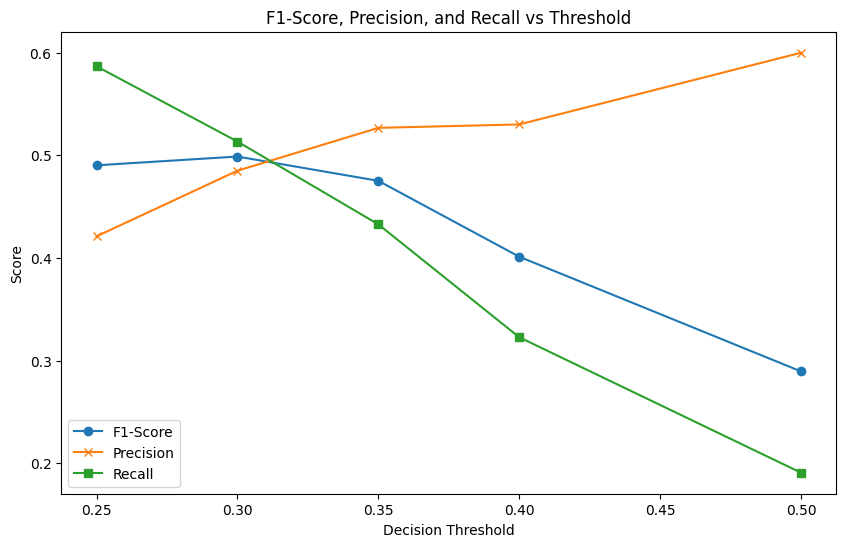

In [25]:
# Plot F1-Score, Precision, and Recall vs Threshold
f1_scores = []
precisions = []
recalls = []
thresholds = [0.25, 0.3, 0.35, 0.4, 0.5]

for thresh in thresholds:
    y_pred_custom_thresh = (y_pred_prob >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_custom_thresh))
    precisions.append(precision_score(y_test, y_pred_custom_thresh))
    recalls.append(recall_score(y_test, y_pred_custom_thresh))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
plt.plot(thresholds, precisions, label='Precision', marker='x')
plt.plot(thresholds, recalls, label='Recall', marker='s')
plt.xlabel('Decision Threshold')
plt.ylabel('Score')
plt.title('F1-Score, Precision, and Recall vs Threshold')
plt.legend()
plt.show()


# F1-Score, Precision, and Recall vs. Threshold:

This plot visualizes the relationship between the F1-Score, precision, and recall at various decision thresholds. It demonstrates that at lower thresholds (e.g., 0.25,0.3,0.35), recall is higher, which aligns with our priority of capturing as many positive cases as possible. While the F1-Score peaks around 0.3, indicating an optimal balance between precision and recall, we choose the threshold of 0.25 because it maximizes recall, which is essential for our application.


<a id='svm'></a>
# Modelling (SVM)




## 1- Splitting the Data:

Split the dataset into Train and Test sets

In [26]:
#(x represent idependent variables, y represents dependent variables)
allFeatures = ['CreditScore',	'Geography',	'Gender',	'Age',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary']
X = df[allFeatures]  # independant variable
y = df['Exited']  # dependant (target)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 2-Model Training:

train two SVM models, one with a polynomial kernel (poly) and the other with a radial basis function kernel (rbf). Each kernel provides different ways of separating data; the polynomial is suited for complex but structured relationships, while the RBF kernel is effective for more flexible boundaries.

In [27]:
poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
rbf = SVC(kernel='rbf', gamma=0.005, C=5).fit(X_train, y_train)



## 3. Model Testing:

generate predictions on the test data using each trained SVM model (poly and rbf). These predictions will be used to evaluate model performance.

In [28]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

## 4-Model Evaluation:

calculate both the accuracy and the F1-score, focusing on weighted F1 to account for any class imbalances. These scores help measure how well the model captures correct predictions and balances precision and recall.

**Polynomial kernel**

In [29]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy * 100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1 * 100))

Accuracy (Polynomial Kernel):  79.67
F1 (Polynomial Kernel):  70.66


**RBF Kernel**

In [30]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy * 100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1 * 100))

Accuracy (RBF Kernel):  79.63
F1 (RBF Kernel):  70.64


## 5- Finding the Best Parameters Using GridSearchCV

optimizes the SVM model by combining PCA for dimensionality reduction with GridSearchCV for parameter tuning. It first defines a set of potential values for C (regularization strength) and gamma (RBF kernel influence), ensuring flexibility in model boundaries. PCA is dynamically set to use an optimal number of components, maximizing data retention while reducing computation. Using a pipeline, PCA is applied before training the SVM, and GridSearchCV performs a thorough cross-validation to identify the best parameter combination, balancing model complexity and performance. Finally, the best parameters are printed for use in the final model.

In [32]:
import joblib

param_grid = {
    'svc__C': [1, 5, 10],      # Regularization parameters
    'svc__gamma': [0.0005, 0.001, 0.005]  # Kernel coefficient for RBF
}

# Step 3: Dynamically set the number of PCA components (less than min(n_samples, n_features))
n_components = min(X_train.shape[1], X_train.shape[0]) - 1

# Initialize PCA and the SVM model
pca = PCA(n_components=n_components, whiten=True, random_state=42)
svm = SVC(kernel='rbf', class_weight='balanced')

# Step 4: Create a pipeline for PCA and SVM
model = make_pipeline(pca, svm)

# Step 5: Perform Grid Search with Cross-Validation
grid = GridSearchCV(model, param_grid, verbose=2, cv=5)

# Train the model using Grid Search
grid.fit(X_train, y_train)

# Step 6: Display the best parameters found
print(f'Best parameters: {grid.best_params_}')
joblib.dump(grid.best_estimator_, 'svm_model.pkl')



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=   4.4s
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=   6.2s
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=   4.6s
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=   3.6s
[CV] END ........................svc__C=1, svc__gamma=0.0005; total time=   3.2s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   2.7s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   2.0s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   2.1s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   2.1s
[CV] END .........................svc__C=1, svc__gamma=0.001; total time=   2.0s
[CV] END .........................svc__C=1, svc__gamma=0.005; total time=   2.9s
[CV] END .........................svc__C=1, svc__

['svm_model.pkl']

best model selected from a grid search used to make predictions on the test dataset. The classification report for this best model is printed, which includes precision, recall, and F1 scores for each class. Additionally, the overall accuracy and weighted F1 score of the best model's predictions are calculated and displayed as percentages. This evaluation helps assess the model's performance, particularly its effectiveness with the Radial Basis Function (RBF) kernel.

In [36]:

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Print final classification report for the best model
print("\nClassification Report (Best Model - RBF Kernel):\n", classification_report(y_test, y_pred))

# Print accuracy and F1 score for the best model
best_accuracy = accuracy_score(y_test, y_pred)
best_f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy (Best Model - RBF Kernel): {best_accuracy * 100:.2f}%')
print(f'F1 Score (Best Model - RBF Kernel): {best_f1 * 100:.2f}%')


Classification Report (Best Model - RBF Kernel):
               precision    recall  f1-score   support

           0       0.92      0.78      0.84      1991
           1       0.46      0.73      0.56       508

    accuracy                           0.77      2499
   macro avg       0.69      0.75      0.70      2499
weighted avg       0.83      0.77      0.79      2499

Accuracy (Best Model - RBF Kernel): 77.07%
F1 Score (Best Model - RBF Kernel): 78.74%


## 6- Confusion Matrix


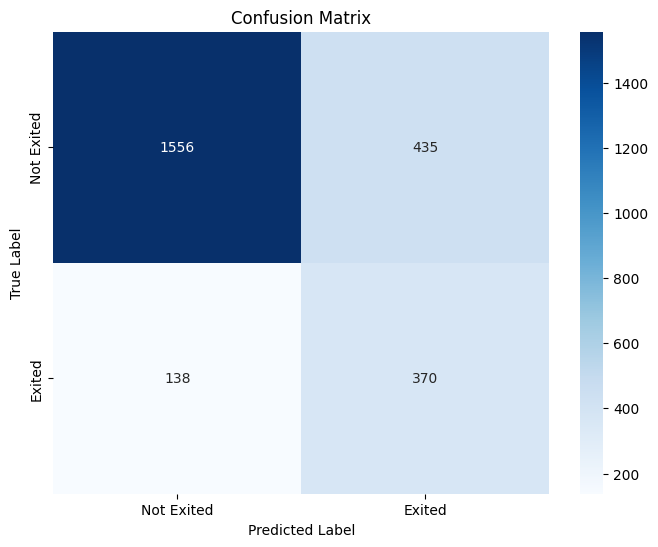

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Define class labels
class_names = ['Not Exited', 'Exited']  # Adjust based on your classes

# Plot the confusion matrix
plot_confusion_matrix(cm, class_names)

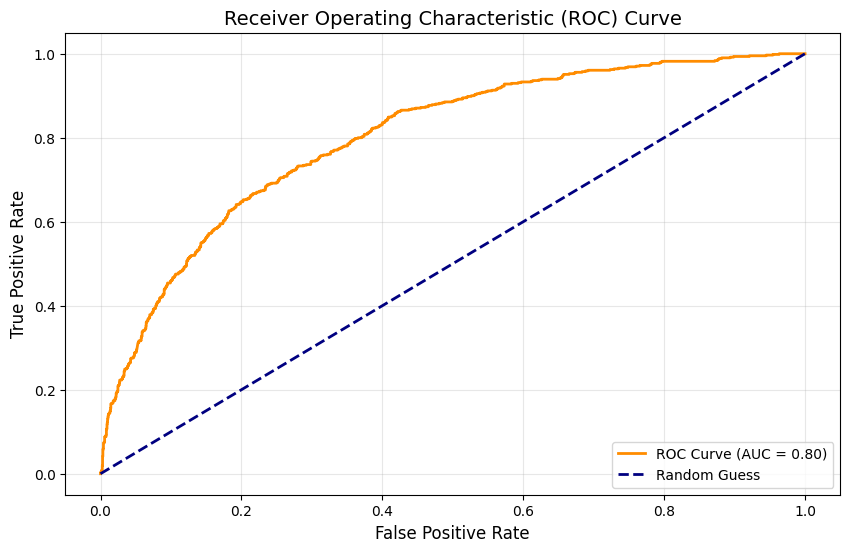

In [38]:
# Plot ROC Curve
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load and prepare the dataset
# Assuming your DataFrame is named 'df'
allFeatures = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
               'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = df[allFeatures]  # Independent variables
y = df['Exited']     # Target variable

# Encode categorical variables if necessary (Geography, Gender)
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train the SVM model with probability=True
svm_with_prob = SVC(kernel='rbf', probability=True, C=1, gamma=0.005, class_weight='balanced')
svm_with_prob.fit(X_train, y_train)

# Step 4: Evaluate the model
# Predict probabilities for the positive class
y_probs = svm_with_prob.predict_proba(X_test)[:, 1]
y_pred = svm_with_prob.predict(X_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Step 5: Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Step 6: Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Build the Dense neural network

In [40]:
# Build the neural network model with modifications
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

X = df.drop(columns=['Exited'])  # features
y = df['Exited']  # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
model.save('dense_nn_model.h5')




Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6225 - loss: 0.7283 - val_accuracy: 0.8215 - val_loss: 0.4175
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7867 - loss: 0.4726 - val_accuracy: 0.8430 - val_loss: 0.3808
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8149 - loss: 0.4302 - val_accuracy: 0.8505 - val_loss: 0.3683
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8201 - loss: 0.4127 - val_accuracy: 0.8530 - val_loss: 0.3638
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8234 - loss: 0.4030 - val_accuracy: 0.8530 - val_loss: 0.3609
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8237 - loss: 0.3952 - val_accuracy: 0.8530 - val_loss: 0.3580
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.3823 - val_accuracy: 0.8490 - val_loss: 0.3551
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8361 - loss: 0.3806 - val_accuracy: 0.

Test Accuracy: 0.8575


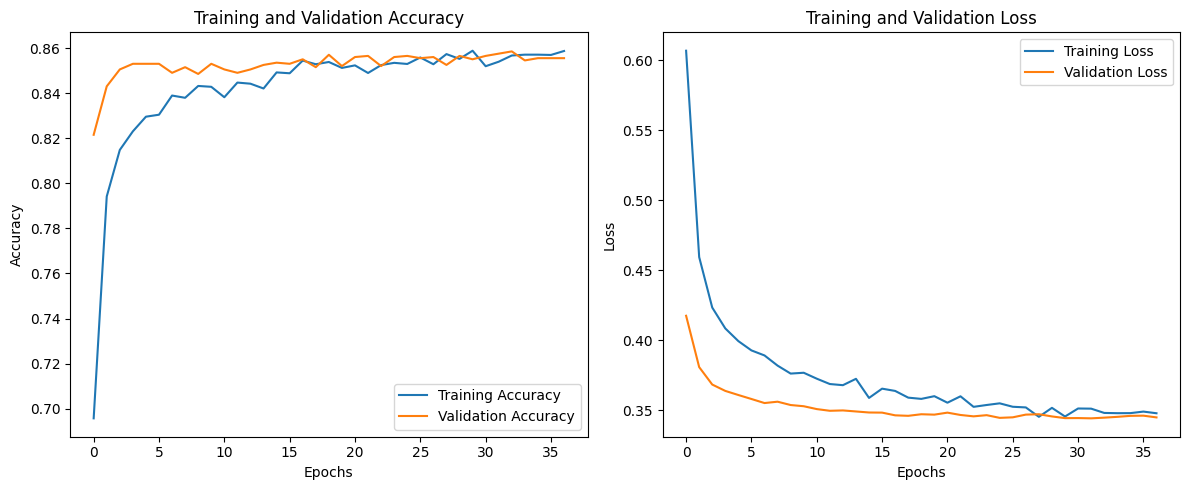

In [41]:
# Plot training and validation loss over epochs
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


#Training and Validation Accuracy:
 This plot shows how the model's accuracy changes over epochs for both the training and validation sets. The lines converge, indicating that the model is learning effectively without severe overfitting or underfitting.

#Training and Validation Loss:
 This plot depicts the loss for both the training and validation sets over epochs. The gradual decrease in loss suggests that the model is optimizing well. The validation loss stabilizes, indicating good generalization.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


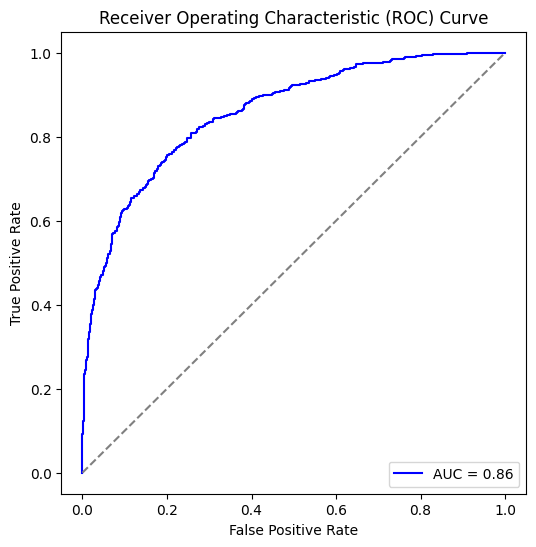

In [42]:
# Plot ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test).ravel()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


#ROC Curve and AUC:
 The ROC (Receiver Operating Characteristic) curve illustrates the model’s ability to distinguish between classes. The curve’s area under the curve (AUC) value of 0.86 suggests a strong classifier, as the curve approaches the top-left corner, indicating high sensitivity and specificity.

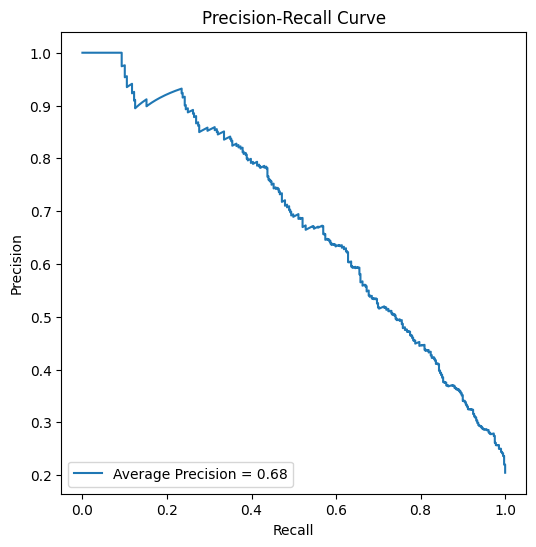

In [43]:
# Plot Precision-Recall curve
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(6, 6))
plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


#Precision-Recall Curve:
 This curve shows the trade-off between precision and recall across different thresholds. The area under this curve is 0.67, indicating decent performance, especially when precision is critical.

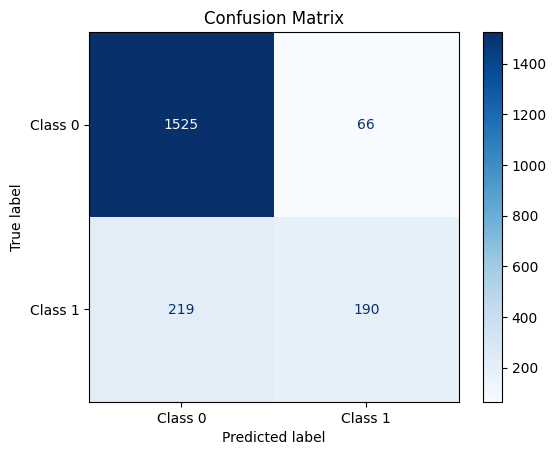

In [44]:
# Compute and plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


#Confusion Matrix:
  Shows that the model effectively identifies non-churners (1524 true negatives) but has a moderate count of false negatives (230), meaning it misses some actual churners. While it correctly predicts churn for 179 customers (true positives), there are 67 false positives, where non-churners are incorrectly flagged as churners. This analysis indicates that while the model is good at identifying non-churners, improving recall to capture more at-risk churners could enhance retention efforts. Balancing the reduction of false positives and false negatives can help refine intervention strategies and optimize resource allocation.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


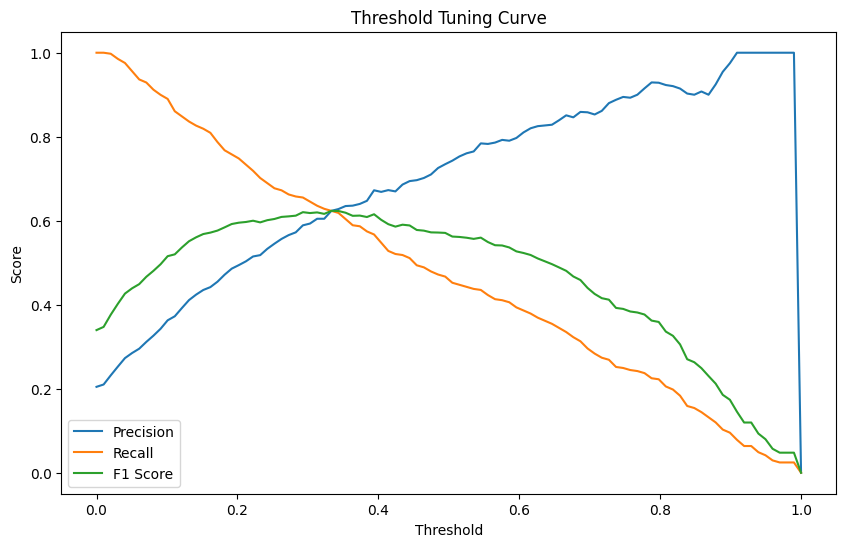

In [45]:
# Plot Precision, Recall, and F1 Score vs. Threshold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

thresholds = np.linspace(0.0, 1.0, 100)
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob > threshold).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning Curve')
plt.legend()
plt.show()


#Precision, Recall, and F1 Score over Epochs:
 This graph presents the precision, recall, and F1 scores over epochs, showing the balance between these metrics. The convergence around the center indicates stability in the model’s performance.

# Build the 1D-CNN model


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6971 - loss: 0.5983 - val_accuracy: 0.7955 - val_loss: 0.4911
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8050 - loss: 0.4610 - val_accuracy: 0.8000 - val_loss: 0.4673
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7977 - loss: 0.4695 - val_accuracy: 0.8105 - val_loss: 0.4434
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8099 - loss: 0.4490 - val_accuracy: 0.8095 - val_loss: 0.4352
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8076 - loss: 0.4413 - val_accuracy: 0.8090 - val_loss: 0.4334
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8081 - loss: 0.4511 - val_accuracy: 0.8110 - val_loss: 0.4282
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8071 - loss: 0.4386 - val_accuracy: 0.8140 - val_loss: 0.4251
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8163 - loss: 0.4320 - val_accuracy: 0.

Test Accuracy: 0.8275


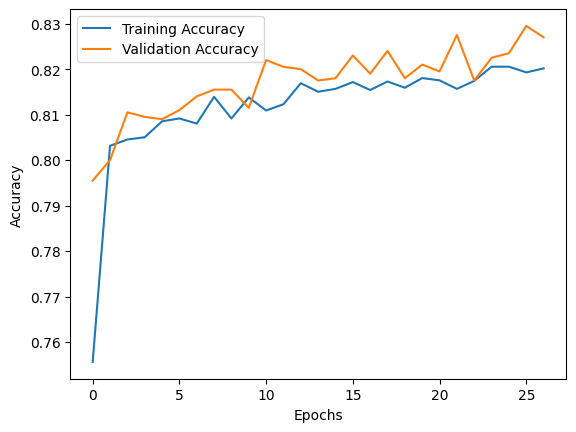

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, GlobalAveragePooling1D, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# Separate features and target
X = df.drop(columns=['Exited'])  # features
y = df['Exited']  # target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input layer with the shape of the input data
    Conv1D(64, kernel_size=2, activation='relu'),  # 1D Convolutional layer
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(32, kernel_size=2, activation='relu'),  # Another 1D Convolutional layer
    BatchNormalization(),
    Dropout(0.3),
    GlobalAveragePooling1D(),  # Reduces dimensions to a single vector
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
model.save('cnn_model.h5')

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


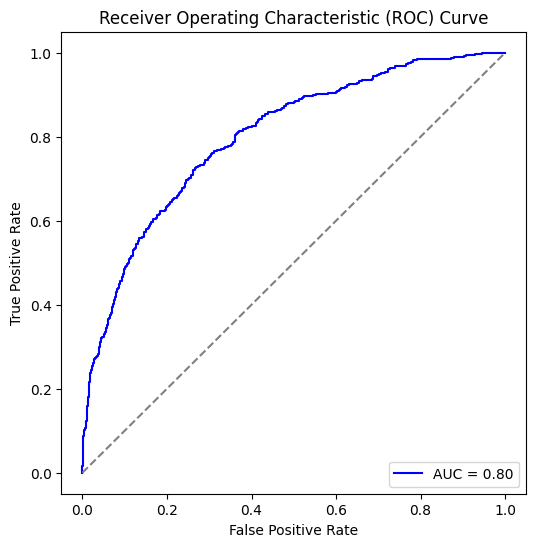

In [47]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test).ravel()  # Flatten to 1D array if needed

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


This chart shows the (ROC) curve, which plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) for various thresholds. The Area Under the Curve (AUC) score of 0.81 indicates good model performance in distinguishing between the positive and negative classes.

#Precision-Recall Curve:

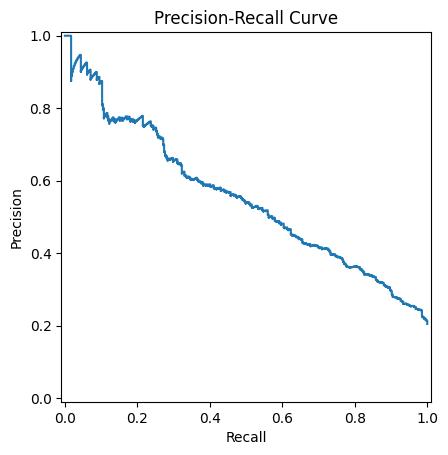

In [48]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Precision-Recall Curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()


This curve highlights the trade-off between precision and recall across different decision thresholds. The gradual decline in precision as recall increases indicates the model's ability to balance retrieving relevant positive samples while avoiding false positives.

#Confusion Matrix:



<Figure size 600x600 with 0 Axes>

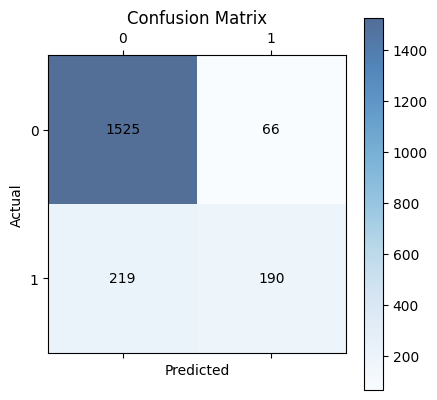

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.matshow(conf_matrix, cmap='Blues', alpha=0.7)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], ha='center', va='center')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


The confusion matrix shows the number of true positives (187), true negatives (1530), false positives (61), and false negatives (222). It provides insights into the model's performance in classification, including misclassification counts.

#Precision, Recall, and F1 Score over Thresholds:

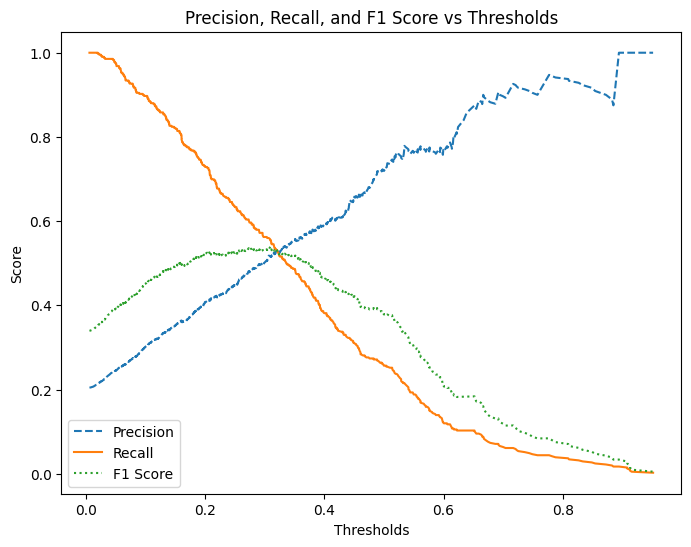

In [50]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

f1_scores = 2 * (precision * recall) / (precision + recall)

# Plot precision, recall, and F1 score against thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall', linestyle='-')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', linestyle=':')
plt.xlabel('Thresholds')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs Thresholds')
plt.legend()
plt.show()


This chart illustrates how precision, recall, and F1 score vary with changing decision thresholds. The intersection of precision and recall at certain thresholds suggests an optimal balance point, while the F1 score indicates the harmonic mean of precision and recall.

In [51]:
# Select 5 examples from the dataset
test_examples = X_test[:5]  # Replace with specific examples if needed
true_labels = y_test[:5]    # Replace with corresponding true labels


In [52]:
# Load Logistic Regression and SVM models
logistic_model = joblib.load('logistic_regression_model.pkl')
svm_model = joblib.load('svm_model.pkl')

# Load Dense NN and 1D-CNN models
from tensorflow.keras.models import load_model
dense_nn_model = load_model('dense_nn_model.h5')
cnn_model = load_model('cnn_model.h5')


In [59]:
# Reshape test examples for Logistic Regression
if len(test_examples.shape) > 2:
    test_examples_2d = test_examples.reshape(test_examples.shape[0], -1)
else:
    test_examples_2d = test_examples

# Predict using Logistic Regression
logistic_preds = logistic_model.predict(test_examples_2d)
print("Logistic Regression Predictions:", logistic_preds)
print("True Labels:", true_labels.values)

# Predict using SVM
svm_preds = svm_model.predict(test_examples_2d)
print("SVM Predictions:", svm_preds)
print("True Labels:", true_labels.values)

# Predict using Dense NN
dense_preds = (dense_nn_model.predict(test_examples) > 0.5).astype(int).flatten()
print("Dense Neural Network Predictions:", dense_preds)
print("True Labels:", true_labels.values)

# Reshape test examples for 1D-CNN
cnn_test_examples = test_examples[:, :, np.newaxis] if len(test_examples.shape) == 2 else test_examples
cnn_preds = (cnn_model.predict(cnn_test_examples) > 0.5).astype(int).flatten()
print("1D-CNN Predictions:", cnn_preds)
print("True Labels:", true_labels.values)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Logistic Regression Predictions: [0 0 0 0 0]
True Labels: [1 0 0 0 0]
SVM Predictions: [1 1 1 1 1]
True Labels: [1 0 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Dense Neural Network Predictions: [0 0 0 0 0]
True Labels: [1 0 0 0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1D-CNN Predictions: [0 0 0 0 0]
True Labels: [1 0 0 0 0]


<a id='ref'></a>
# *References*


[1] “How To Interpret R-squared in Regression Analysis,” Statisticsbyjim. https://statisticsbyjim.com/regression/interpret-r-squared-regression/

[2] A. Kumar, “SVM RBF Kernel Parameters: Python Examples - Analytics Yogi,” Analytics Yogi, Apr. 15, 2023. https://vitalflux.com/svm-rbf-kernel-parameters-code-sample/

[3] GeeksforGeeks, “How to choose the best kernel function for SVMs,” GeeksforGeeks, Feb. 23, 2024. https://www.geeksforgeeks.org/how-to-choose-the-best-kernel-function-for-svms/